In [2]:
import math
import pandas as pd
%matplotlib inline

## Casos de COVID-19 em Curitiba

Relatório contendo as informações sobre o número de casos de COVID-19 no município de Curitiba.

### Dicionário de dados de casos de COVID-19

In [3]:
df_casos_dic = pd.read_csv('./data/casos/2022-02-01_Dicionario_de_Dados-Casos_de_COVID.csv', sep=';', encoding='latin-1')
df_casos_dic

,Nome do Campo,Descrição
0,DATA INCLUSÃO,Data em que caso de COVID foi incluído na base...
1,CLASSIFICAÇÃO,Informa se o caso do COVID foi confirmado
2,IDADE,Idade do paciente no momento da notificação do...
3,SEXO,Sexo do Paciente
4,BAIRRO,Informa o Bairro de residência do paciente no ...
5,DISTRITO,Informa o Distrito Sanitário de residência do ...
6,DATA DO ÓBITO,Data em que ocorreu o óbito
7,ENCERRAMENTO,Informa a conclusão final do caso de COVID se ...


### Base de dados de casos de COVID-19

In [4]:
df_casos_base = pd.read_csv('./data/casos/2023-04-05_Casos_Covid_19_-_Base_de_Dados.csv', sep=';', encoding='latin-1')
df_casos_base

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO (SIM/NÃO),DATA COLETA EXAME,DATA ÓBITO,ENCERRAMENTO
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,NÃO,08/03/2020,NaN,RECUPERADO
2,12/03/2020,CONFIRMADO,43,M,XAXIM,DSBQ,NÃO,09/03/2020,NaN,RECUPERADO
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
...,...,...,...,...,...,...,...,...,...,...
587302,04/04/2023,CONFIRMADO,57,M,ALTO BOQUEIRÃO,DSBQ,NÃO,03/04/2023,NaN,ATIVO
587303,04/04/2023,CONFIRMADO,11,F,GUAÍRA,DSPR,NÃO,03/04/2023,NaN,ATIVO
587304,04/04/2023,CONFIRMADO,13,M,NOVO MUNDO,DSPN,NÃO,03/04/2023,NaN,ATIVO
587305,04/04/2023,CONFIRMADO,82,F,CENTRO,DSMZ,NÃO,03/04/2023,NaN,ATIVO


In [5]:
print("Número de casos: ", len(df_casos_base))

Número de casos:  587307


In [6]:
df_casos_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587307 entries, 0 to 587306
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   DATA INCLUSÃO/ NOTIFICAÇÃO  587307 non-null  object
 1   CLASSIFICAÇÃO FINAL         587307 non-null  object
 2   IDADE (anos)                587307 non-null  int64 
 3   SEXO                        587307 non-null  object
 4   BAIRRO                      577010 non-null  object
 5   DISTRITO RESIDÊNCIA         577020 non-null  object
 6   INTERNADO (SIM/NÃO)         587307 non-null  object
 7   DATA COLETA EXAME           587307 non-null  object
 8   DATA ÓBITO                  8712 non-null    object
 9   ENCERRAMENTO                587307 non-null  object
dtypes: int64(1), object(9)
memory usage: 44.8+ MB


In [7]:
df_casos_base.describe()

,IDADE (anos)
count,587307.000000
mean,39.701167
std,18.226986
min,0.000000
25%,26.000000
50%,39.000000
75%,52.000000
max,107.000000


### Número de casos por bairro

In [8]:
df_bairros = df_casos_base['BAIRRO'].value_counts()
df_bairros

CIDADE INDUSTRIAL DE CURITIBA    57678
SÍTIO CERCADO                    36381
CAJURU                           29765
UBERABA                          23477
BOQUEIRÃO                        23314
                                 ...  
TABOÃO                             846
CASCATINHA                         813
SÃO MIGUEL                         747
LAMENHA PEQUENA                    221
RIVIERA                             87
Name: BAIRRO, Length: 75, dtype: int64

In [9]:
print("Número de bairros: ", len(df_bairros))

Número de bairros:  75


In [12]:
df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'] = pd.to_datetime(df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'])
df_casos_base

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO (SIM/NÃO),DATA COLETA EXAME,DATA ÓBITO,ENCERRAMENTO
0,2020-11-03,CONFIRMADO,54,M,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
1,2020-12-03,CONFIRMADO,15,M,XAXIM,DSBQ,NÃO,08/03/2020,NaN,RECUPERADO
2,2020-12-03,CONFIRMADO,43,M,XAXIM,DSBQ,NÃO,09/03/2020,NaN,RECUPERADO
3,2020-12-03,CONFIRMADO,25,F,CRISTO REI,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
4,2020-12-03,CONFIRMADO,58,M,MERCÊS,DSMZ,NÃO,09/03/2020,NaN,RECUPERADO
...,...,...,...,...,...,...,...,...,...,...
587302,2023-04-04,CONFIRMADO,57,M,ALTO BOQUEIRÃO,DSBQ,NÃO,03/04/2023,NaN,ATIVO
587303,2023-04-04,CONFIRMADO,11,F,GUAÍRA,DSPR,NÃO,03/04/2023,NaN,ATIVO
587304,2023-04-04,CONFIRMADO,13,M,NOVO MUNDO,DSPN,NÃO,03/04/2023,NaN,ATIVO
587305,2023-04-04,CONFIRMADO,82,F,CENTRO,DSMZ,NÃO,03/04/2023,NaN,ATIVO


### Número de casos sexo masculino

<AxesSubplot:>

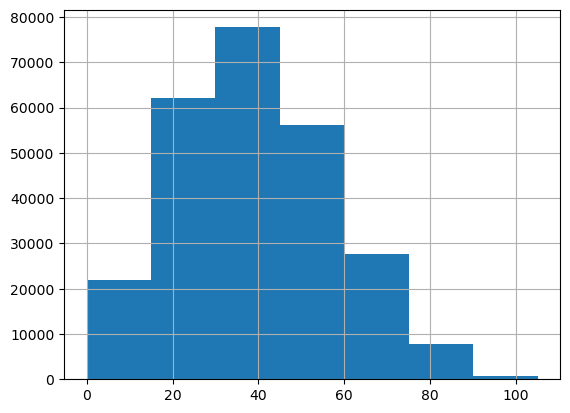

In [20]:
selec_masc = df_casos_base['SEXO'] == "M"
df_masc = df_casos_base[selec_masc]
df_masc['IDADE (anos)'].hist(bins=7)

### Número de casos sexo feminino

<AxesSubplot:>

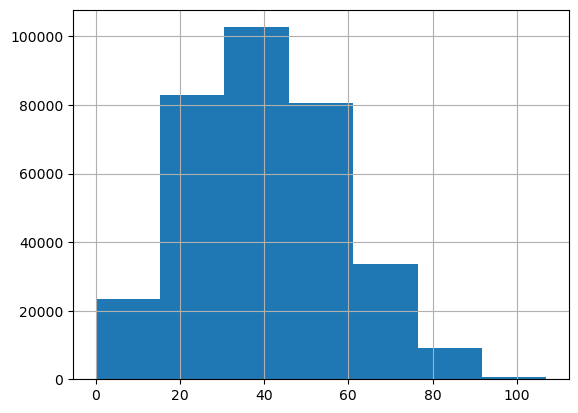

In [21]:
selec_fem = df_casos_base['SEXO'] == "F"
df_fem = df_casos_base[selec_fem]
df_fem['IDADE (anos)'].hist(bins=7)

### Casos COVID-19 de acordo com a idade

<AxesSubplot:ylabel='Density'>

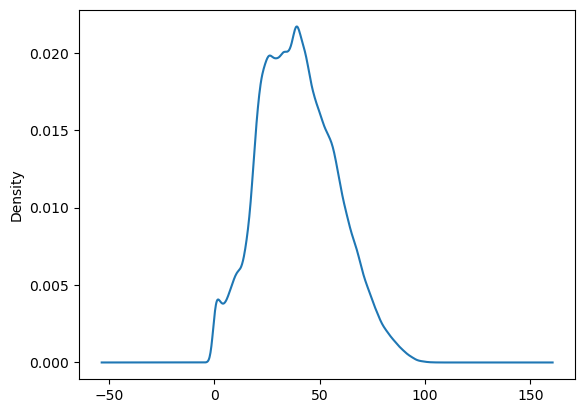

In [22]:
df_casos_base['IDADE (anos)'].plot.kde()

### Número de casos de COVID-19 por ano

In [13]:
df_casos_ano = df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'].groupby(df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'].dt.year.rename('ANO')).agg('count')
df_casos_ano

ANO
2020    108653
2021    191371
2022    275921
2023     11362
Name: DATA INCLUSÃO/ NOTIFICAÇÃO, dtype: int64

<AxesSubplot:xlabel='ANO'>

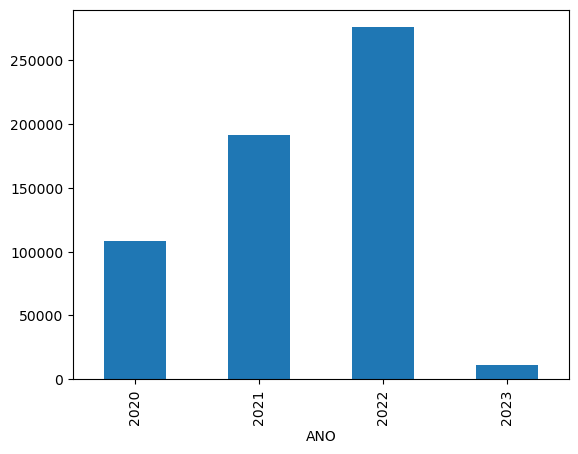

In [51]:
df_casos_ano.plot.bar(y='ANO')

<AxesSubplot:ylabel='DATA INCLUSÃO/ NOTIFICAÇÃO'>

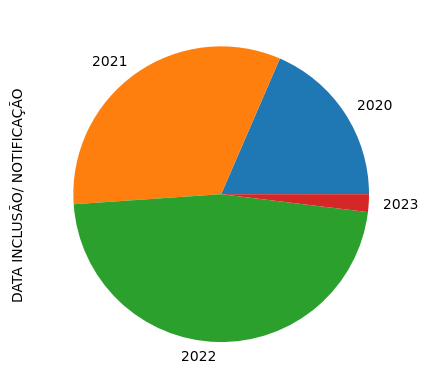

In [28]:
df_casos_ano.plot.pie()

### Número de casos COVID-19 por mês

In [35]:
df_casos_mes = df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'].groupby([df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'].dt.year.rename('ANO'), df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'].dt.month.rename('MÊS')]).agg('count')
df_casos_mes

ANO   MÊS
2020  1       2354
      2       3072
      3       4659
      4       3300
      5       3672
      6       8028
      7      13601
      8       9365
      9       9130
      10     10265
      11     23628
      12     17579
2021  1      16345
      2      15897
      3      24903
      4      15877
      5      24217
      6      18584
      7      16474
      8      22462
      9      12903
      10      8018
      11      7287
      12      8404
2022  1      67186
      2      27110
      3      10002
      4      10973
      5      33685
      6      27775
      7      18305
      8      12207
      9       7066
      10     10695
      11     26418
      12     24499
2023  1       1660
      2       2146
      3       4072
      4        573
      5        290
      6        686
      7        290
      8        212
      9        571
      10       465
      11       208
      12       189
Name: DATA INCLUSÃO/ NOTIFICAÇÃO, dtype: int64

### Número de casos COVID-19 por mês em cada bairro

In [24]:
df_casos_mes_bairro = df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'].groupby([df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'].dt.year.rename('ANO'), df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'].dt.month.rename('MÊS'), df_casos_base['BAIRRO']]).agg('count')
df_casos_mes_bairro

ANO   MÊS  BAIRRO        
2020  1    ABRANCHES         10
           AHÚ               21
           ALTO BOQUEIRÃO    55
           ALTO DA GLÓRIA    10
           ALTO DA RUA XV    22
                             ..
2023  12   UBERABA           10
           UMBARÁ             1
           VILA IZABEL        1
           XAXIM              7
           ÁGUA VERDE         3
Name: DATA INCLUSÃO/ NOTIFICAÇÃO, Length: 3442, dtype: int64

<AxesSubplot:xlabel='DATA INCLUSÃO/ NOTIFICAÇÃO'>

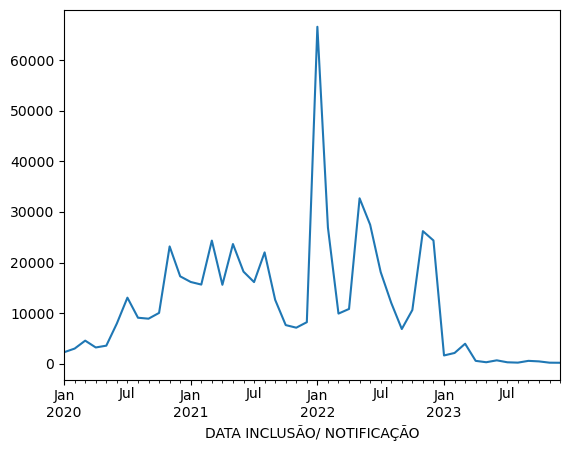

In [30]:
periodo = df_casos_base['DATA INCLUSÃO/ NOTIFICAÇÃO'].dt.to_period("M")
df_casos_base.groupby(periodo)['BAIRRO'].count().plot()